# Task 1

## Counts

A python function called **counts** that takes a list as its input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values.

#### For example

Input: \['A', 'A', 'B', 'C', 'A'\]

Output: {'A': 3, 'B': 1, 'C': 1}

In [2]:
def counts(list_input):
    
    # Dictionary to return with the lists items as keys
    dict_output = {} 
    
    # Iterate items in the list to add to the dictionary
    for item in list_input:
        
        # Check if the item is already in the dictionary
        if item in dict_output:
            # Increment count for existing item
            dict_output[item] += 1
        else:
            # Create key and set count to 1 as item is unique to dict 
            dict_output[item] = 1
    
    return dict_output
    

#### Test counts function with example list input from tasks question
Simple list of strings 1 character long: \['A', 'A', 'B', 'C', 'A'\]

In [3]:
task_example_input = ['A', 'A', 'B', 'C', 'A']

Print output of function

In [4]:
print(counts(task_example_input))

{'A': 3, 'B': 1, 'C': 1}


## Other inputs and expected issues

While the function counts works with the example use case from the task given and produces the desired output there is a few issues to note that may produce unexpected results. Below a few other inputs and their outputs will be described as well as what cannot be used as keys [1]. For example objects of type list or dict cannot be used as keys. This is because dictionary keys must be immutable and not mutable [2] as mutable objects are not hashable [3].

#### Strings as keys
A list with string input works with each unique sting being counted. Keys are the full string for strings with multiple characters and strings with the same characters but different cases are treated as different keys. Special characters are treated just as a string and spaces within, before and after a string make the string and so key unique. Integers and floats saved as strings create keys which are strings.

In [5]:
string_input = ['A', 'A', 'B', 'C', 'A', 'AA', 'a', 'bA', 'AB', 'AA ', 'a', 'bA', 'AB.', " AB",
                'A2', '5553', '-7737.99', 'hello world', '\\', '\r', '\r', '\'', '\"', 'helloworld',
                'A2', '5553', '-7737.99', 'hello world', '\\', '\r', '\r', '\'', '\"', " "]

In [6]:
print(counts(string_input))

{'A': 3, 'B': 1, 'C': 1, 'AA': 1, 'a': 2, 'bA': 2, 'AB': 1, 'AA ': 1, 'AB.': 1, ' AB': 1, 'A2': 2, '5553': 2, '-7737.99': 2, 'hello world': 2, '\\': 2, '\r': 4, "'": 2, '"': 2, 'helloworld': 1, ' ': 1}


#### Integers as keys
Integers as a key works as expected with each unique number being a unique key.

In [7]:
int_input = [1, 2, 728299, 838, 2, 1, 2, 5553, 5553]

In [8]:
print(counts(int_input))

{1: 2, 2: 3, 728299: 1, 838: 1, 5553: 2}


#### Floats as keys
Floats are immutable and so can be used as keys to a dictionary. This is shown below:

In [9]:
float_input = [1.24, 2.55, 728299.877, -838.23, 2.55, 1.241, 2.55, 5553.9, -5553.9, 1.0, 1.0]

In [10]:
print(counts(float_input))

{1.24: 1, 2.55: 3, 728299.877: 1, -838.23: 1, 1.241: 1, 5553.9: 1, -5553.9: 1, 1.0: 2}


There is a couple of things to note with floats though so not to get unexpected results from the counts formula.  
  
When mixing floats with integers and there is two values that evaluate to the same thing eg. the float 2.0 and the int 2 counts will treat these as the same key even though they are different objects. This is because the interpreter evaluates these to be the same.  
  
Where a user may expect input \[1.0, 1\]  to produce {1.0: 1, 1: 1} it will produce {1.0: 2} 
2 by 1.0 as 1.0 occurs in the list first.

In [11]:
mix_float_int_input = [1, 1.0, 1.000, 2.00, 2.0, 2]

In [12]:
print(counts(mix_float_int_input))

{1: 3, 2.0: 3}


Difference's in floating point precison could also cause an unexpected result. Two floating point numbers that a user may expect to be equal may not be after an arithmetic operation [4].

This is demoed below:

In [13]:
a = 0.123456
b = 0.987654
 
math_floats_input = [a, b, (a/b)*b, (b/a)*a]

In [14]:
print(counts(math_floats_input))

{0.123456: 2, 0.987654: 1, 0.9876540000000001: 1}


As you can see the precision of the 2nd arithmetic operation doesnt make the value equal b as could be expected. The first operation ends up equaling a but this shows that using floats as keys could be unpredictable. The list math_floats_input though actaually shows that these floats arent equal so in that sense where a list of different floats getting turned into keys with the value being occurances then the function counts is working as expected   

In [15]:
print(math_floats_input)

[0.123456, 0.987654, 0.123456, 0.9876540000000001]


#### Boolean as keys
A boolean object can also be used as a dictionary key as they are immutable.

In [16]:
bool_input = [True, False, True, True, False]

In [17]:
print(counts(bool_input))

{True: 3, False: 2}


As Python evaluates True and 1 as the same aswell as False and 0 this can cause an issue when a mixed list containing them is given to counts similar to the float 1.0 and int 1 issue [5]. Where input \[True, 1, 1.0\] could be expected to produce the output {True: 1, 1: 1, 1.0: 1} it actually produces {True: 3} and this is something to consider when using counts.

In [18]:
mixed_bool_int_float_input = [True, 1, 1.0, 0.0, False, 0]

In [19]:
print(counts(mixed_bool_int_float_input))

{True: 3, 0.0: 3}


#### Lists cant be keys

A list object cannot be a key due to it being mutable and not so not hashable [6]. Mutable means they can be altered and immutable means they cannot. For example a list can be added to changing its value while a int's value can be updated but a new object is returned. If a mutable object like a list is attempted to be used as a key it will provide a TypeError and with the error because the list is unhashable. This is shown below:

In [20]:
list_input = [[1,2], ['2', 'hello'], 5, 'hello', True]

In [21]:
print(counts(list_input))

TypeError: unhashable type: 'list'

## An updated counts function

The function counts below has been updated to work with the mutable types list, dict and set. If the object type that is to be checked to be used as a key is an instance of the class or subclass of any of these three it will be skipped and the next item in the list will be checked instead (if any). isinstance is used here instead of type to catch any subclasses [7].

A check to make sure the input to the function is an instance of list was added as a list of items is expected. If the input is not a list then a blank dictionary will be returned by the function.  

In [22]:
def counts(list_input):
    
    # Dictionary to return with the lists items as keys
    dict_output = {} 
    
    # If the input to the function is from the list class then the function will run as expected
    # If not an empty dict will be returned
    if isinstance(list_input, list):
        
        # Iterate items in the list to add to the dictionary
        for item in list_input:
        
            # Check if object is an instance of the list, dict or set class and skip it if so
            if isinstance(item, list) or isinstance(item, dict) or isinstance(item, set):
                continue
        
            # Check if the item is already in the dictionary        
            if item in dict_output:
                # Increment count for existing item
                dict_output[item] += 1
            else:
                # Create key and set count to 1 as item is unique to dict 
                dict_output[item] = 1
    
    return dict_output

The below is an example of how the function now handles a list which objects of type list, set and dict aswell as immutable objects:

In [23]:
mixed_input = [[1,2], ['2', 'hello'], 5, 5, 5, 'hello', True, (2,7), {3: 4}, {'a', 'b', 'c'}]

In [24]:
print(counts(mixed_input))

{5: 3, 'hello': 1, True: 1, (2, 7): 1}


If the input is not a list as below the output will be an empty dict:

In [25]:
non_list_input = 5

In [26]:
print(counts(non_list_input))

{}


# Task 2

## Task brief
Write a Python function called dicerolls that simulates
rolling dice. Your function should take two parameters: the number of dice k and
the number of times to roll the dice n. The function should simulate randomly
rolling k dice n times, keeping track of each total face value. It should then return
a dictionary with the number of times each possible total face value occurred. So,
calling the function as diceroll(k=2, n=1000) should return a dictionary like:   
{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}   


You can use any module from the Python standard library you wish and you should
include a description with references of your algorithm in the notebook.

## The Code

Python's random will be used to get the random value for the dice [8]. The randint function from it can be used to return a random integer within a range (eg. 1-6 for a 6 sided die) [9]. 

In [27]:
# Bring in the random libary for generating the random dice values
import random

In [28]:
# An example of randint returning a die roll
print(random.randint(1,6))

1


#### Reusing the counts function from task 1
The counts function from task 1 will come in handy here with the expected dictionary output required.

### The dicerolls function
This is the function that was required for the task. It takes two values k and n. k is the number of dice and n is the number of times to roll them.

The output of the function is a dictionary with the number of times each possible total face value occurred. This dictionary has been sorted by its key values to match the output in the task assignment. This limits the function for to Python version 3.7 and above [10].

In [29]:
# The diceroll function with default values for k and n as they were in example
def dicerolls(k=2, n=1000):
    
    # Check that both k and n are valid inputs
    for letter, input_to_check in (("k", k), ("n", n)):
        
        # Raise an error with feedback if an input is not an integer
        if not isinstance(input_to_check, int):
            raise TypeError(f"Only integers are allowed for {letter}, type entered:{type(input_to_check)}")
            
        # Raise an error with feedback if an input is less than 1
        if input_to_check < 1:
            raise ValueError(f"{letter} was {input_to_check} and cannot be less than 1. Please enter a number that is 1 or greater")
    
    # List to save all dice totals
    dice_totals_list = []
    
    # Repeat the rolling of the dice for as many times as n requires from the input
    for interation in range(0, n):
        # Interger to hold the total of dice rolled each time 
        dice_total = 0
    
        # Loop to roll as many dice as the input k
        for die in range(0, k):
        
            # Use randint to simulate the roll of a six sided die
            die_value = random.randint(1,6)
        
            # Increment the total with the new die's value
            dice_total += die_value

        # Append the dice total to the list so it can be used with the counts function
        dice_totals_list.append(dice_total)
    
    # Use the counts function to return with the number of times each possible total face value occurred
    dict_output = counts(dice_totals_list)
    
    # sort the dictionary keys for a better view of the output and to
    # look more like the example output from the task.
    dict_output = dict(sorted(dict_output.items()))
    
    # Return the dictionary of each total face value combo
    return dict_output

In [30]:
dicerolls(2, 1000)

{2: 32,
 3: 50,
 4: 90,
 5: 107,
 6: 146,
 7: 157,
 8: 136,
 9: 117,
 10: 84,
 11: 54,
 12: 27}

#### Error handling
The function dicerolls is designed to raise a TypeError or ValueError if either of its inputs are not desired. For example both inputs have to be of type integer. This is because a fraction of a dice is not a thing and an each interation with n must be a full iteration. For this a TypeError is raised [11].    

n and k must also be 1 or greater. This is because there must be at least 1 iteration and at least 1 die. A ValueError is raised if this is not the case for either input [12].

An example where k is less than 1:

In [31]:
dicerolls(0, 1000)

ValueError: k was 0 and cannot be less than 1. Please enter a number that is 1 or greater

An example where n is less than 1:

In [32]:
dicerolls(5, -1000)

ValueError: n was -1000 and cannot be less than 1. Please enter a number that is 1 or greater

An example where k is a float:

In [33]:
dicerolls(90.0, 1000)

TypeError: Only integers are allowed for k, type entered:<class 'float'>

An example where n is a string:

In [34]:
dicerolls(9, "2")

TypeError: Only integers are allowed for n, type entered:<class 'str'>

# Task 3

The numpy.random.binomial function can be used to
simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a
coin is flipped many times then the number of heads is well approximated by a
bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively
low, and the chances of getting any other number of heads decreases as you move
away from 50 in either direction towards 0 or 100. Write some python code that
simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track
of the number of heads in each of the 1,000 simulations. Select an appropriate
plot to depict the resulting list of 1,000 numbers, showing that it roughly follows
a bell-shaped curve. You should explain your work in a Markdown cell above the
code.

Generating 1000 simulations for 100 values with 2 possible outcomes could be done very quickly with the binomial function from the Numpy library [13]

In [35]:
# Bring in the numpy libary for generating a binomial distribution 
import numpy as np

In [42]:
# Number of times to flip the coin 
n = 100
# Probability of each coin flip being heads
p = .5

# Create array representing the probability of 100 coin flips ran 1000 times 
coin_flip_array = np.random.binomial(n, p, 1000)

In [74]:
coin_flip_array

array([55, 55, 46, 54, 53, 48, 53, 56, 54, 54, 63, 60, 43, 54, 57, 52, 57,
       52, 50, 58, 47, 45, 55, 57, 56, 46, 43, 47, 47, 46, 57, 49, 53, 60,
       49, 55, 50, 57, 52, 59, 46, 46, 55, 54, 45, 49, 58, 54, 48, 53, 49,
       54, 47, 50, 53, 48, 50, 56, 31, 49, 48, 47, 54, 41, 44, 54, 52, 48,
       54, 61, 51, 48, 47, 47, 55, 48, 61, 48, 56, 58, 50, 51, 50, 51, 46,
       56, 47, 55, 59, 52, 46, 59, 48, 54, 50, 55, 44, 53, 48, 47, 58, 49,
       50, 57, 51, 45, 60, 54, 42, 48, 58, 59, 45, 49, 56, 50, 47, 48, 58,
       48, 48, 51, 49, 42, 52, 46, 51, 49, 52, 48, 40, 42, 54, 59, 56, 52,
       48, 36, 51, 57, 47, 45, 54, 53, 53, 46, 42, 45, 45, 49, 53, 44, 53,
       50, 44, 45, 51, 49, 48, 51, 46, 55, 54, 50, 54, 55, 40, 52, 46, 53,
       45, 41, 46, 50, 44, 52, 52, 50, 49, 45, 48, 49, 51, 48, 51, 43, 46,
       46, 39, 47, 45, 59, 48, 50, 53, 53, 55, 52, 47, 52, 49, 59, 54, 59,
       52, 47, 49, 46, 48, 61, 45, 58, 57, 51, 56, 53, 52, 52, 50, 43, 47,
       54, 44, 49, 49, 58

This array can be converted to a list and used in the counts funtion from task 1 to produce a dictionary with the number of occurrences of each heads total between 0 and 100.

In [82]:
coin_flip_frequency = counts(list(coin_flip_array))

In [84]:
# Sort dictionary by keys for easier viewing
coin_flip_frequency = dict(sorted(coin_flip_frequency.items()))

In [85]:
coin_flip_frequency

{31: 1,
 36: 3,
 37: 4,
 38: 4,
 39: 7,
 40: 10,
 41: 18,
 42: 15,
 43: 34,
 44: 43,
 45: 45,
 46: 61,
 47: 73,
 48: 72,
 49: 56,
 50: 95,
 51: 65,
 52: 70,
 53: 62,
 54: 60,
 55: 59,
 56: 45,
 57: 29,
 58: 25,
 59: 19,
 60: 7,
 61: 10,
 62: 5,
 63: 2,
 65: 1}

In [121]:
# Bring in the matplotlib libary for graphing
import matplotlib.pyplot as plt

As you can see below the frequency of the values around 50 is alot higher and shows the chance of the total heads reduces as it goes to either 0 or 100. The data forms a bell shaped curve on the graph showing this

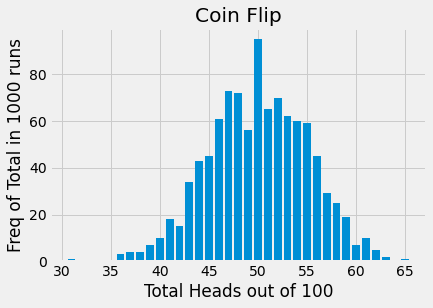

In [122]:
# Plot dictionary as graph using zip [14]
plt.bar(*zip(*coin_flip_frequency.items()))
# Set Labels [15]
plt.title('Coin Flip')
plt.xlabel('Total Heads out of 100')
plt.ylabel('Freq of Total in 1000 runs')
plt.show()

### References
[1] Restrictions on Dictionary Keys  
https://realpython.com/python-dicts/

[2] Mutable and Immutable Data Types in Python  
https://towardsdatascience.com/https-towardsdatascience-com-python-basics-mutable-vs-immutable-objects-829a0cb1530a

[3] Mutable, Immutable and Hashable  
https://medium.com/@mitali.s.auger/python3-sometimes-immutable-is-mutable-and-everything-is-an-object-22cd8012cabc

[4] Floats as dict keys issue  
https://diego.assencio.com/?index=67e5393c40a627818513f9bcacd6a70d

[5] Mixing boolean with int/float for a pythons dict's keys  
https://dbader.org/blog/python-mystery-dict-expression

[6] Lists as dictionary keys   
https://wiki.python.org/moin/DictionaryKeys#:~:text=The%20builtin%20list%20type%20should,thus%20usable%20as%20dictionary%20keys.

[7] Difference between isinstance and type   
https://switowski.com/blog/type-vs-isinstance#:~:text=Difference%20between%20isinstance%20and%20type&text=type%20only%20returns%20the%20type,specified%20as%20a%20second%20parameter.

[8] The random library   
https://docs.python.org/3/library/random.html

[9] Using random to simulate a dice roll   
https://www.geeksforgeeks.org/dice-rolling-simulator-using-python-random/

[10] Sorting a dictionary by its keys Python 3.7 >  
https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key

[11] Raising a TypeError   
https://www.w3schools.com/python/ref_keyword_raise.asp

[12] Raising a ValueError   
https://www.journaldev.com/33500/python-valueerror-exception-handling-examples#:~:text=Here%20is%20a%20simple%20example

[13] Numpy.random.binomial function   
https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

[14] Plotting a dictionary using ImportanceOfBeingErnest's answer as guide   
https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary

[15] Setting labels with matplotlib  
https://matplotlib.org/3.1.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py